In [7]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import scienceplots

plt.style.use("science")

In [8]:
def avg_leeds(acetone, benzene, ethanol):
    # weight average of the three Leeds sets based on dataset size
    return (acetone * 401 + benzene * 416 + ethanol * 625) / (401 + 416 + 625)

In [9]:
training_size = [20, 50, 100, 200, 500, 1000, 2000, 3500, 5215]
sobolev_solprop_rmse = [1.02, 1.03, 1.07, 0.95, 0.95, 0.88, 0.82, 0.81, 0.79]
sobolev_leeds_rmse = [
    avg_leeds(0.93, 1.08, 0.98),
    avg_leeds(0.93, 1.07, 1.05),
    avg_leeds(0.91, 1.04, 1.00),
    avg_leeds(0.89, 1.07, 0.96),
    avg_leeds(0.82, 0.99, 1.02),
    avg_leeds(0.83, 0.98, 1.01),
    avg_leeds(0.86, 0.98, 0.99),
    avg_leeds(0.87, 0.96, 0.99),
    avg_leeds(0.90, 0.94, 0.98),
]
nonsobolev_solprop_rmse = [0.97, 1.10, 1.06, 0.92, 0.87, 0.86, 0.83, 0.86, 0.83]
nonsobolev_leeds_rmse = [
    avg_leeds(0.98, 1.06, 1.02),
    avg_leeds(0.97, 1.11, 1.12),
    avg_leeds(0.95, 1.09, 1.05),
    avg_leeds(0.90, 1.03, 0.99),
    avg_leeds(0.85, 1.02, 1.10),
    avg_leeds(0.82, 1.01, 1.06),
    avg_leeds(0.85, 1.01, 1.05),
    avg_leeds(0.83, 1.00, 1.05),
    avg_leeds(0.86, 1.00, 1.04),
]
lower_experimental_limit = [0.5] * len(training_size)
upper_experimental_limit = [1.0] * len(training_size)

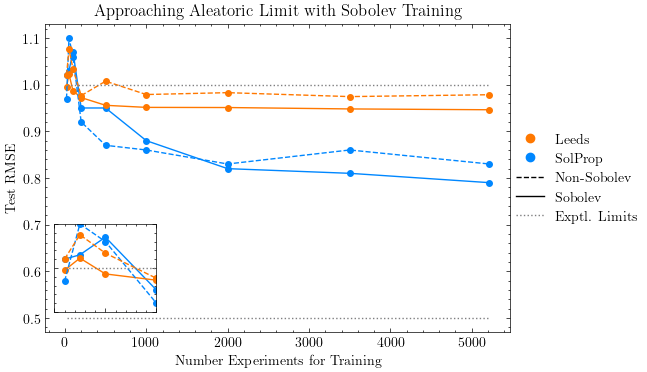

In [11]:
fig = plt.figure(figsize=(6, 4))
plt.plot(training_size, sobolev_solprop_rmse, label="_Sobolev SolProp", linestyle="-", color="#0087FF", marker="o", markersize=4)
plt.plot(training_size, sobolev_leeds_rmse, label="_Sobolev Leeds", linestyle="-", color="#FF7800", marker="o", markersize=4)
plt.plot(training_size, nonsobolev_solprop_rmse, label="_Non-Sobolev SolProp", linestyle="--", color="#0087FF", marker="o", markersize=4)
plt.plot(training_size, nonsobolev_leeds_rmse, label="_Non-Sobolev Leeds", linestyle="--", color="#FF7800", marker="o", markersize=4)
plt.plot(training_size, lower_experimental_limit, label="_Lower Exptl. Limit", linestyle=":", color="#7f7f80")
plt.plot(training_size, upper_experimental_limit, label="_Upper Exptl. Limit", linestyle=":", color="#7f7f80")
# legend entries
plt.plot([], [], label='Leeds', color="#FF7800", marker="o", linestyle="")
plt.plot([], [], label='SolProp', color="#0087FF", marker="o", linestyle="")
plt.plot([], [], label='Non-Sobolev', color="k", marker="", linestyle="--")
plt.plot([], [], label='Sobolev', color="k", marker="", linestyle="-")
plt.plot([], [], label='Exptl. Limits', color="#7f7f80", marker="", linestyle=":")
plt.xlabel("Number Experiments for Training")
plt.ylabel("Test RMSE")
# plt.xscale('log', base=2)
plt.title("Approaching Aleatoric Limit with Sobolev Training")
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))

inset_ax: Axes = fig.add_axes([0.14, 0.16, 0.17, 0.22])  # [left, bottom, width, height]
inset_ax.plot(training_size, sobolev_solprop_rmse, label="_Sobolev SolProp", linestyle="-", color="#0087FF", marker="o", markersize=4)
inset_ax.plot(training_size, sobolev_leeds_rmse, label="_Sobolev Leeds", linestyle="-", color="#FF7800", marker="o", markersize=4)
inset_ax.plot(training_size, nonsobolev_solprop_rmse, label="_Non-Sobolev SolProp", linestyle="--", color="#0087FF", marker="o", markersize=4)
inset_ax.plot(training_size, nonsobolev_leeds_rmse, label="_Non-Sobolev Leeds", linestyle="--", color="#FF7800", marker="o", markersize=4)
inset_ax.plot(training_size, lower_experimental_limit, label="_Lower Exptl. Limit", linestyle=":", color="#7f7f80")
inset_ax.plot(training_size, upper_experimental_limit, label="_Upper Exptl. Limit", linestyle=":", color="#7f7f80")
inset_ax.set_xlim(0, 200)
inset_ax.set_ylim(0.9, 1.1)
inset_ax.set_yticklabels([])
inset_ax.set_xticklabels([])
plt.savefig("aleatoric_limit.svg")
plt.show()